# Reducción de la dimensionalidad y exploración de datos

Modificación de una libreta del [curso de José Dianes de `code mentor`](https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka).

## Adquisición de los datos

Los datos que vamos a analizar es la prevalencia de casos de tuberculosis en diferentes países desde 1990 al 2007. Estos datos provienen de la página [Gapminder website](http://www.gapminder.org/), en donde se encuentran muchos conjuntos de indicadores de diferentes paises y regiones del mundo. En su apartado [Data section](http://www.gapminder.org/data/) viene una lista de tablas que pueden ser descargadas como hojas de cálculo de *Google docs**.  

Para esta libreta vamos a usar el conjunto de datos [TB estimated prevalence (existing cases) per 100K](https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0), y lo vamos a descargar como un *csv*. Vamos a leer el archivo como un DataFrame de Pandas. Para quienes nunca han usado Pandas este es un modulo de python que se basa en numpy y que trata de replicar las facilidades de tratamiento de datos como tablas que ofrece el lenguaje de programación R. Si no tienes experiencia previa en Pandas se anexa en los documentos de la tarea una libreta de introducción al uso de Pandas que espero sea de utilidad.


Ahora vamos a leer el archivo como un `DataFrame` de `Pandas`. Para quienes nunca han usado `Pandas` este es un modulo de *python* que se basa en *numpy* y que trata de replicar las facilidades de tratamiento de datos como tablas que ofrece el lenguaje de programación *R*. Si no tienes experiencia previa en *Pandas* se anexa en los documentos de la tarea una libreta de introducción al uso de *Pandas* que espero sea de utilidad.   

In [37]:
import numpy as np
import pandas as pd

url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'

tuberculosis_df = pd.read_csv(url_csv, index_col = 0, thousands  = ',')
tuberculosis_df.index.names = ['País']
tuberculosis_df.columns.names = ['Año']

Se especificó que `index_col` es 0 ya que los nombres de los países son las etiquetas de cada objeto. Dado que los datos numéricos vienen formateados, se le aviso al lector que los números tienen una coma para separar los miles. Por último se le dió un nombre a la columna de índices y otro nombre al renglon de etiquetas de los atributos. Veamos los 10 primeros datos:  

In [38]:
tuberculosis_df.head()

Año,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
País,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


Y vamos a ver un resumen de la informaci´n que tenemos en el `DataFrame`:

In [39]:
tuberculosis_df.describe()

Año,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


Como podemos ver, son 207 paises y para nuestro análisis (o al menos como queremos hacer más adelante el análisis de los estados de México) son demasiados, por lo que vamos a seleccionar 30 al azar (y cada vez será diferente para que esto se ponga entretenido).

In [40]:
red_df = tuberculosis_df.sample(30)

red_df

Año,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
País,,,,,,,,,,,,,,,,,,
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
Ukraine,67,64,67,72,75,78,87,93,104,109,120,128,133,135,132,113,99,102
Thailand,336,319,307,297,291,285,285,279,256,231,223,194,197,189,188,184,189,192
Kuwait,89,84,80,75,72,68,66,64,61,35,33,33,30,29,29,30,25,25
Singapore,52,52,53,50,49,49,50,50,48,44,39,36,34,32,31,28,27,27
Turkmenistan,105,99,101,97,92,80,92,114,137,142,130,115,110,103,98,91,85,75
El Salvador,133,126,119,112,105,99,97,80,76,72,69,66,62,60,57,52,50,48
Suriname,109,100,79,80,76,78,88,101,118,122,115,113,113,120,126,136,146,155
Libyan Arab Jamahiriya,46,45,45,43,43,42,41,38,36,23,22,22,21,20,19,18,18,17


## Reducción de la dimensionalidad con PCA

Como en este caso lo que nos interesa es poder hacer una exploración de los datos, vamos a usar el análisis en componentes principales como una herramienta para obtener la mejor foto posible de los datos que nos interesan. Por esta razón, solo vamos a utilizar las dos primeras componentes principales.

Para hacer los componentes principales, no los vamos a programar, si no que vamos a utilizar una biblioteca superpoderosa para aprendizaje máquina `Sklearn`. Si bien estas bibliotecas nos facilitan la vida, hay que tener cuidado de entender la documentación y saber que hace cada algoritmo, si no estaríamos como *el burro que toco la flauta*.

Por ejemplo, para hacer el análisis en componentes principales, simplemente tenemos que hacer:

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(red_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [42]:
red_pca = pca.transform(red_df)

Tambien hubieramos podido llamar simplemente `fit_transform` para hacer ambos pasos en uno solo. Ahora vamos a transformar el `ndarray` que obtuvimos en un `DataFrame` de *Pandas* para mantener el formato.

In [43]:
red_pca_df = pd.DataFrame(red_pca)
red_pca_df.index = red_df.index
red_pca_df.columns = ['CP_1','CP_2']
red_pca_df.head()

,CP_1,CP_2
País,,
Algeria,-490.241933,37.184739
Ukraine,-278.686837,132.156760
Thailand,372.245177,-119.431043
Kuwait,-463.167412,-69.227151
Singapore,-509.427464,-16.062179


La varianza de los datos que explican los dos primeros componentes principales es:

In [44]:
print(pca.explained_variance_ratio_) 

[ 0.94430165  0.03697954]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?

Ya estamos listos para imprimir los resultados y vamos a usar las facilidades de graficación que provée *Pandas*. Si quieres saber más, consulta [aquí](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). Y para que se vea *fancy* vamos a agregar el nombre del país a cada uno de los puntos de la gráfica.    

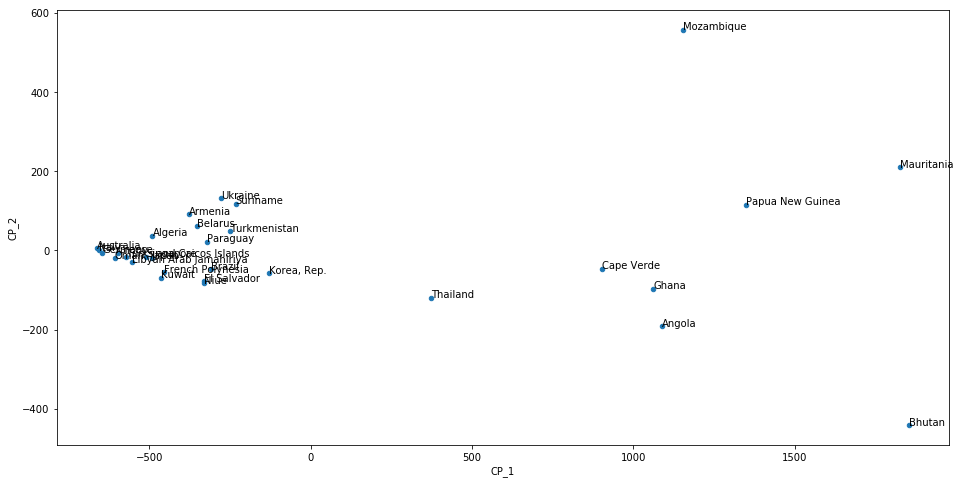

In [45]:
%matplotlib inline

ax = red_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(red_pca_df.index):
    ax.annotate(pais, (red_pca_df.iloc[i].CP_1, red_pca_df.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los paises a lo largo del eje `CP_1` explica mejor las diferencias entre paises.  

## Buscando similitudes entre paises usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vaos a utilizar una técnica semi automátixzada llamada *el método del codo*, en la cuálse calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 


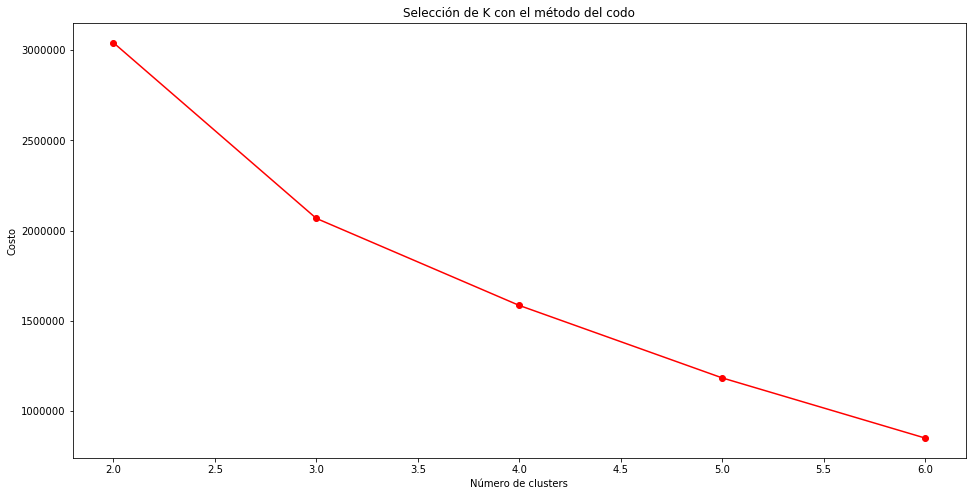

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(red_df)
    costos.append(-kmeans.score(red_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')


En el caso particular que yo tome (cada caso al repetirse es diferente) me encuentro con dos codos, uno en 3 y unos en 4, pero el de 4 es mñas pronunciado, así que me quedo con ese.

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

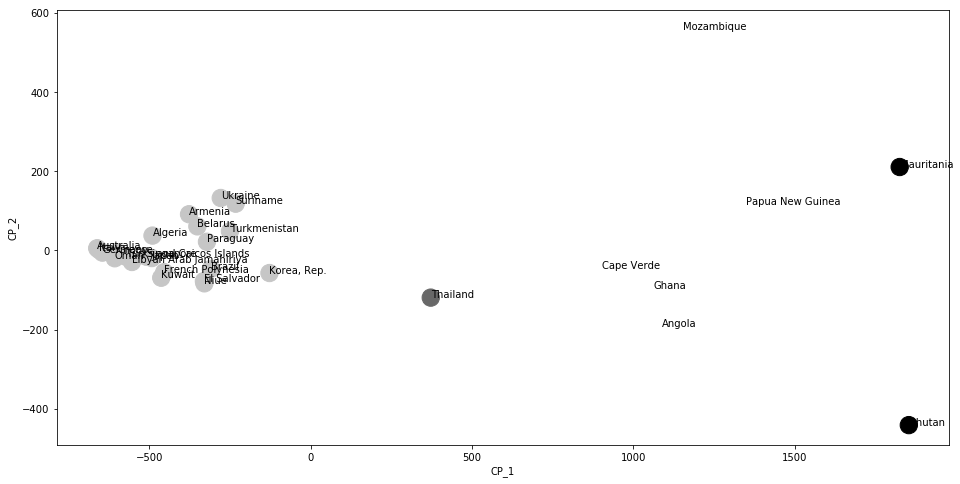

In [47]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(red_df)
red_pca_df['grupos'] = pd.Series(clusters.labels_, index=red_pca_df.index)


ax = red_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=red_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(red_pca_df.index):
    ax.annotate(pais, (red_pca_df.iloc[i].CP_1, red_pca_df.iloc[i].CP_2))


Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de paises.

In [48]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = red_df.columns
prototipos_df.index.names = ['Protopipo']
prototipos_df.columns.names = ['Año']

prototipos_df

Año,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Protopipo,,,,,,,,,,,,,,,,,,
P1,456.200000,456.400000,453.600000,450.000000,445.000000,440.600000,442.400000,408.600000,421.600000,420.000000,452.6,398.600000,414.600000,409.800000,414.800000,394.000000,382.200000,372.200000
P2,72.454545,67.818182,66.545455,63.818182,63.090909,62.454545,63.818182,55.909091,57.681818,62.090909,55.5,54.590909,76.409091,50.409091,49.454545,48.136364,46.818182,47.181818
P3,336.000000,319.000000,307.000000,297.000000,291.000000,285.000000,285.000000,279.000000,256.000000,231.000000,223.0,194.000000,197.000000,189.000000,188.000000,184.000000,189.000000,192.000000
P4,754.500000,724.500000,697.000000,671.000000,646.500000,623.000000,621.000000,606.000000,581.500000,576.500000,567.0,568.000000,552.000000,551.000000,468.500000,488.500000,481.000000,461.000000


Lo que es más fácil de analizar que 30 paises. Inclusive se pueden graficar en el tiempo y tiene sentido.

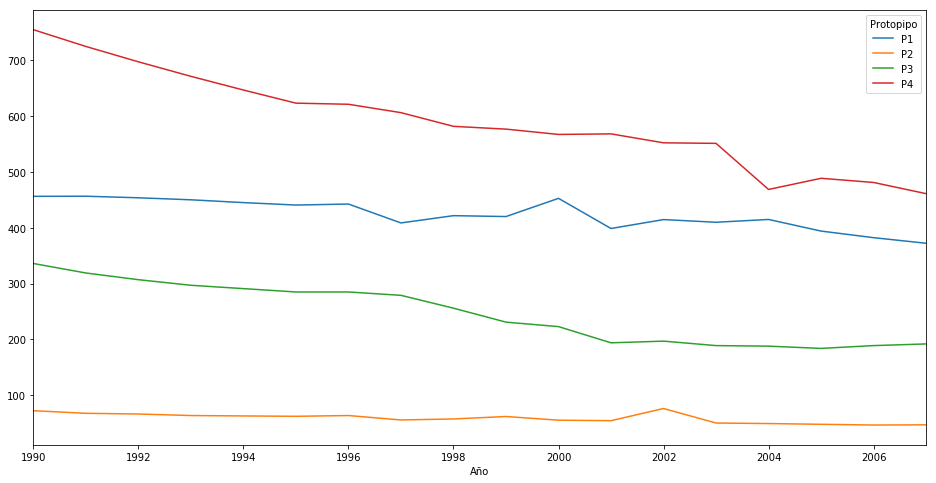

In [49]:
prototipos_df.T.plot(figsize=(16,8))

#### Pregunta para contestar: En función de las gráficas, da una explicación coherente a los diferentes prototipos y que puede significar (i.e. paises con mucha tuberculosis que van mejorando, paises que van empeorando en cuanto a casos de tuberculosis, paises que experimentaron un pico el año XXXX, etc...)

existen grupos de paises dentro de los prototipos que tienen casos de tuberculosis a la baja otros a la alta y unos se mantenienen con muy bajos casos.

# INDICADORES DE BIENESTAR 



## Adquisición de los datos

Los datos que vamos a analizar es la prevalencia de casos de Bienestar en diferentes estados desde 1990 al 2007. Estos datos provienen de la página [Gapminder website](http://www.gapminder.org/), en donde se encuentran muchos conjuntos de indicadores de diferentes paises y regiones del mundo. En su apartado [Data section](http://www.gapminder.org/data/) viene una lista de tablas que pueden ser descargadas como hojas de cálculo de *Google docs**.  

Para esta libreta vamos a usar el conjunto de datos [TB estimated prevalence (existing cases) per 100K](https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0), y lo vamos a descargar como un *csv*. Vamos a leer el archivo como un DataFrame de Pandas. Para quienes nunca han usado Pandas este es un modulo de python que se basa en numpy y que trata de replicar las facilidades de tratamiento de datos como tablas que ofrece el lenguaje de programación R. Si no tienes experiencia previa en Pandas se anexa en los documentos de la tarea una libreta de introducción al uso de Pandas que espero sea de utilidad.


In [50]:
import numpy as np
import pandas as pd


url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'

bienestar2014 = pd.read_csv('indicadores_bienestar_2014.csv', index_col = 0, thousands  = ',')
#bienestar2014.index.names = ['Entidad']
#bienestar2014.columns.names = ['Año']

Se especificó que index_col es 0 ya que los nombres de los países son las etiquetas de cada objeto. Dado que los datos numéricos vienen formateados, se le aviso al lector que los números tienen una coma para separar los miles. Por último se le dió un nombre a la columna de índices y otro nombre al renglon de etiquetas de los atributos. Veamos los 10 primeros datos: 

In [51]:
bienestar2014.head()

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7


Y vamos a ver un resumen de la informaci´n que tenemos en el DataFrame:


In [54]:
bienestar2014.describe()

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,85.360606,33.524848,89.027273,7.054545,48.139394,6.009091,31.787879,59.093939,78.618182,75.215152,...,41.430303,6.942424,13.375758,57.137576,3.727273,60.381818,10.027273,62.512121,0.957576,70.972727
std,2.909139,10.908865,8.661310,2.965225,9.092852,2.646946,6.857922,7.052789,3.790486,0.944101,...,14.999010,7.034959,6.055319,13.472917,1.117831,3.344160,4.638782,24.068532,0.111888,16.715043
min,77.200000,9.470000,60.200000,1.700000,30.900000,0.910000,18.300000,33.300000,69.800000,73.000000,...,14.200000,0.600000,4.800000,35.430000,2.000000,52.300000,3.400000,1.500000,0.700000,29.800000
25%,84.500000,25.810000,86.800000,4.100000,41.700000,4.360000,27.900000,56.300000,76.000000,74.900000,...,30.600000,2.600000,9.400000,47.700000,3.000000,58.400000,6.800000,44.900000,0.900000,66.700000
50%,85.600000,33.350000,91.600000,7.000000,46.000000,5.610000,31.100000,60.100000,78.900000,75.500000,...,41.900000,4.400000,12.500000,56.890000,3.700000,60.400000,9.100000,67.500000,1.000000,74.800000
75%,87.200000,41.390000,94.700000,9.300000,55.300000,7.240000,37.200000,63.600000,81.600000,75.900000,...,50.600000,7.900000,16.800000,67.330000,4.400000,61.800000,12.200000,80.500000,1.000000,82.700000
max,90.900000,55.100000,98.500000,13.000000,70.900000,13.960000,45.000000,68.400000,85.000000,76.700000,...,77.100000,28.100000,33.400000,82.020000,7.400000,67.300000,26.200000,100.000000,1.200000,94.900000


Aqui imprimira la muestra de la informacion de los 32 estados.

In [55]:
red_bienestar = bienestar2014.sample(32)
red_bienestar

,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Puebla,82.6,23.84,84.2,3.5,41.7,3.33,24.5,53.9,74.1,75.0,...,59.4,9.0,20.3,73.47,3.0,60.4,13.7,80.5,0.9,70.2
Morelos,85.0,38.44,90.0,8.5,55.3,3.04,19.1,53.5,77.6,75.9,...,49.5,5.9,10.8,67.33,2.6,56.3,26.2,29.2,1.0,77.9
Michoacán de Ocampo,77.2,23.68,85.4,7.9,54.9,5.10,31.0,60.1,73.3,74.9,...,55.3,9.4,12.5,72.07,2.7,60.0,13.9,40.1,0.9,66.7
Tamaulipas,87.2,37.21,92.4,6.8,45.1,6.87,43.8,63.9,82.3,76.0,...,32.2,2.9,10.6,48.14,4.6,61.6,6.6,71.0,1.0,77.2
Zacatecas,88.5,25.81,90.8,8.2,45.5,6.41,45.0,66.8,80.5,75.5,...,49.0,3.5,14.2,63.25,2.8,56.0,7.2,53.4,1.0,73.0
Guerrero,86.7,20.66,70.3,12.0,56.4,5.78,27.1,57.5,77.0,73.1,...,64.4,23.0,18.1,79.04,2.0,58.3,11.0,43.5,0.7,47.0
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9


# Reducción de la dimensionalidad con PCA

Como en este caso lo que nos interesa es poder hacer una exploración de los datos, vamos a usar el análisis en componentes principales como una herramienta para obtener la mejor foto posible de los datos que nos interesan. Por esta razón, solo vamos a utilizar las dos primeras componentes principales.

Para hacer los componentes principales, no los vamos a programar, si no que vamos a utilizar una biblioteca superpoderosa para aprendizaje máquina Sklearn. Si bien estas bibliotecas nos facilitan la vida, hay que tener cuidado de entender la documentación y saber que hace cada algoritmo, si no estaríamos como el burro que toco la flauta.

Por ejemplo, para hacer el análisis en componentes principales, simplemente tenemos que hacer:


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(red_bienestar)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [57]:
red_pca = pca.transform(red_bienestar)

Tambien hubieramos podido llamar simplemente fit_transform para hacer ambos pasos en uno solo. Ahora vamos a transformar el ndarray que obtuvimos en un DataFrame de Pandas para mantener el formato.

In [58]:
red_pca_bienestar = pd.DataFrame(red_pca)
red_pca_bienestar.index = red_bienestar.index
red_pca_bienestar.columns = ['CP_1','CP_2']
red_pca_bienestar.head()

,CP_1,CP_2
Puebla,-2220.772149,-1652.708538
Morelos,4035.510285,-1325.312257
Michoacán de Ocampo,-5337.732755,-959.737051
Tamaulipas,-5976.535840,1189.101573
Zacatecas,-7456.505174,-571.140882


La varianza de los datos que explican los dos primeros componentes principales es:


In [59]:
print(pca.explained_variance_ratio_)

[ 0.95170979  0.04825322]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?

Ya estamos listos para imprimir los resultados y vamos a usar las facilidades de graficación que provée *Pandas*. Si quieres saber más, consulta [aquí](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). Y para que se vea *fancy* vamos a agregar el nombre del país a cada uno de los puntos de la gráfica.    

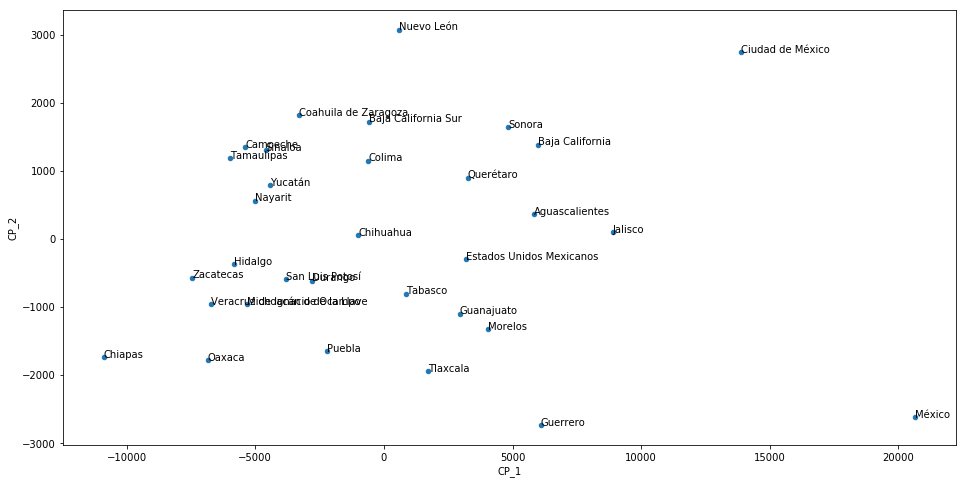

In [60]:
%matplotlib inline

ax = red_pca_bienestar.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(red_pca_bienestar.index):
    ax.annotate(pais, (red_pca_bienestar.iloc[i].CP_1, red_pca_bienestar.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los paises a lo largo del eje `CP_1` explica mejor las diferencias entre paises.  

## Buscando similitudes entre paises usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vaos a utilizar una técnica semi automátixzada llamada *el método del codo*, en la cuálse calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 


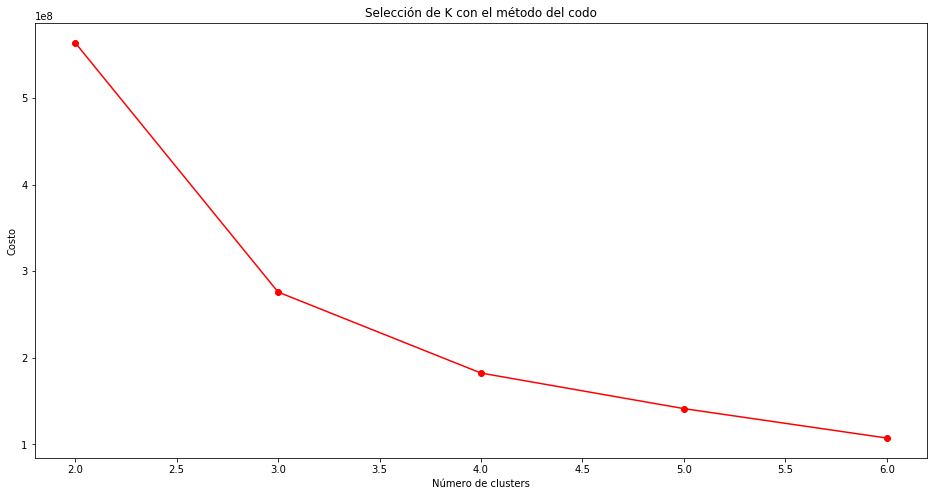

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(red_bienestar)
    costos.append(-kmeans.score(red_bienestar))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

En el caso particular que yo tome (cada caso al repetirse es diferente) me encuentro con dos codos, uno en 3 y unos en 4, pero el de 4 es mñas pronunciado, así que me quedo con ese.

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

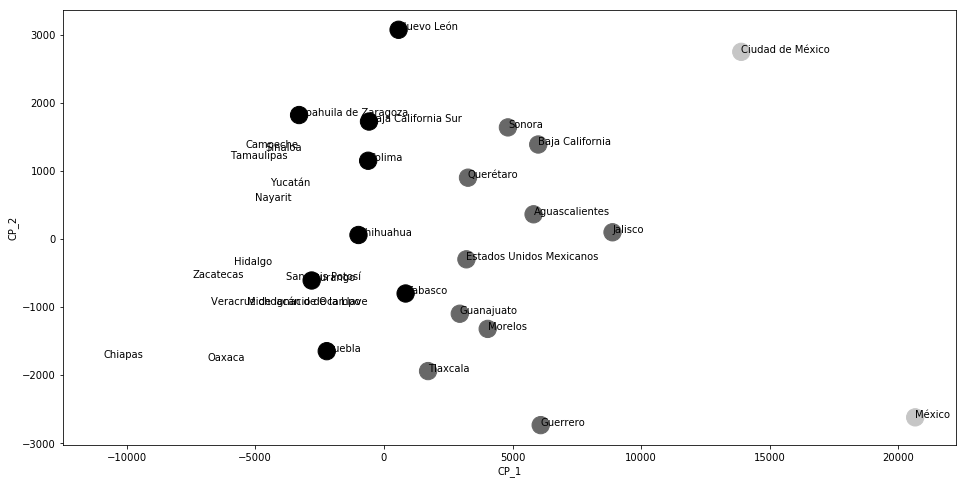

In [62]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(red_bienestar)
red_pca_bienestar['grupos'] = pd.Series(clusters.labels_, index=red_pca_bienestar.index)


ax = red_pca_bienestar.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=red_pca_bienestar.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, estado in enumerate(red_pca_bienestar.index):
    ax.annotate(estado, (red_pca_bienestar.iloc[i].CP_1, red_pca_bienestar.iloc[i].CP_2))

Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de paises.

In [63]:
prototipos_bienestar = pd.DataFrame(kmeans.cluster_centers_)
prototipos_bienestar.index = ['P'+str(i + 1) for i in range(K)]
prototipos_bienestar.columns = red_bienestar.columns
prototipos_bienestar.index.names = ['Protopipo']
prototipos_bienestar.columns.names = ['Año']

prototipos_bienestar

Año,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Protopipo,,,,,,,,,,,,,,,,,,,,,
P1,85.566667,26.23000,84.616667,8.333333,49.116667,7.6425,33.9000,62.466667,77.375,74.875,...,49.691667,10.541667,16.583333,65.388333,3.141667,59.233333,8.3250,46.416667,0.908333,65.9750
P2,82.300000,43.18500,95.300000,3.350000,47.350000,1.4150,20.5000,39.650000,72.150,75.800,...,37.750000,3.950000,13.650000,52.360000,5.100000,60.300000,15.4000,78.750000,1.100000,86.6500
P3,85.330000,35.41100,90.890000,6.870000,47.520000,5.0510,29.9300,58.000000,79.600,75.180,...,39.500000,5.720000,12.010000,55.484000,3.640000,59.710000,12.7000,69.650000,0.960000,75.0400
P4,86.225000,38.04625,91.200000,6.050000,48.675000,6.0425,34.7625,60.575000,80.575,75.550,...,33.950000,4.162500,10.575000,49.202500,4.437500,62.100000,8.6875,72.187500,1.012500,68.0375


Lo que es más fácil de analizar que 30 paises. Inclusive se pueden graficar en el tiempo y tiene sentido.


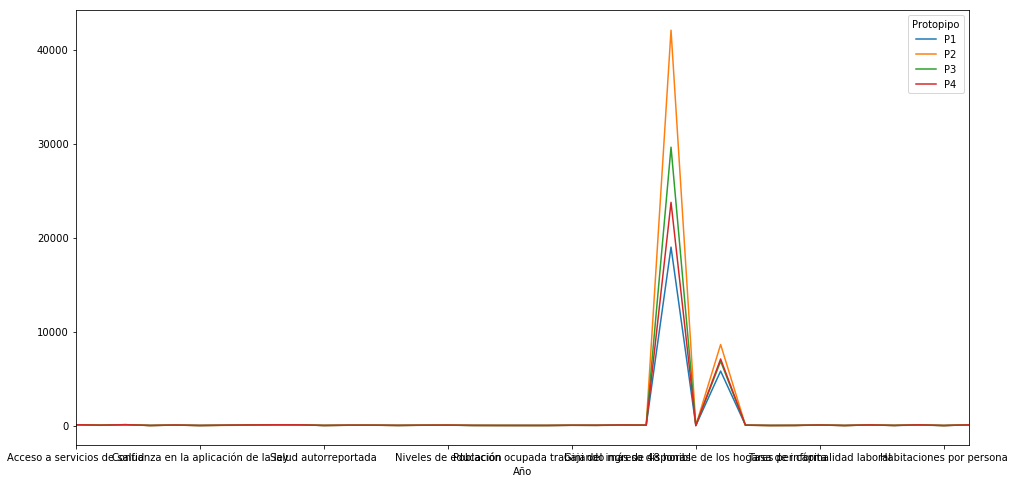

In [64]:
prototipos_bienestar.T.plot(figsize=(16,8))

esta grafica esta rara, el tiempo no varia y por eso se ve mal. 